Коваль Марія, 7 варіант

Задача: $\\$
Чисельно змоделювати процес розмноження мікроорганізмів: 
\begin{gather*}
\frac{∂x}{∂t} = am(x) + \frac{∂^2x}{∂y_1^2} + \frac{∂^2x}{∂y_2^2} + \frac{∂^2x}{∂y_3^2} \\
m(x) = 
\begin{cases}
m_0 - bx, x < x_0 \\
0, x \geq x_0
\end{cases}
\end{gather*}
де $x_0 = \frac{m_0}{b}; m(x) - $ кількість їжі в середовищі, $х$ - кількість мікроорганізмів. 
Граничні умови мають вигляд: 
\begin{gather*}
\frac{∂x}{∂n} \vert_{\Gamma_1} = -c(x - x_{зов}) \\
\frac{∂x}{∂n} \vert_{\Gamma - \Gamma_{1}} = 0
\end{gather*}
Початкові умови:
\begin{gather*}
x \vert_{t = 0} = x_1 \\
x_{зов} = const > x_1
\end{gather*}


Це рівняння параболічного типу. Для простоти позначення замінимо $y_1 \rightarrow u$, $y_2 \rightarrow v$, $y_3 \rightarrow w$.
Обравши кроки $\Delta{u}$  за  $u$, $\Delta{v}$ за $v$ та $\Delta{w}$ за $w$, будуємо сітку:

$\begin{array}{l}
u_i = u_0 + i\Delta{u}, i = 0, \pm{1}, \pm{2}, ..., \\
v_j = v_0 + j\Delta{v}, j = 0, \pm{1}, \pm{2}, ..., \\
w_k = w_0 + k\Delta{w}, k = 0, \pm{1}, \pm{2}, ....
\end{array}$

Заміняємо у кожному внутрішньому вузлі $(u_i , v_j, w_k)$ похідні $\frac{∂^2x}{∂u^2}, \frac{∂^2x}{∂v^2}, \frac{∂^2x}{∂w^2}$ їх скінченно-різницевими аналогами: 

\begin{gather*}
\frac{x_{i,j,k}^{t + \Delta{t}} - x_{i,j,k}^t}{\Delta{t}}  = a \cdot m(x_{i,j,k}^t) + \frac{x_{i+1, j, k}^t - 2x_{i, j, k}^t + x_{i-1, j, k}^t}{\Delta{u^2}} + \frac{x_{i, j+1, k}^t - 2x_{i, j, k}^t + x_{i, j-1, k}^t}{\Delta{v^2}} + \frac{x_{i, j, k+1}^t - 2x_{i, j, k}^t + x_{i, j, k-1}^t}{\Delta{w^2}}
\end{gather*}

\begin{gather*}
x_{i,j,k}^{t + \Delta{t}} = (a \cdot m(x_{i,j,k}^t) + \frac{x_{i+1, j, k}^t - 2x_{i, j, k}^t + x_{i-1, j, k}^t}{\Delta{u^2}} + \frac{x_{i, j+1, k}^t - 2x_{i, j, k}^t + x_{i, j-1, k}^t}{\Delta{v^2}} + \frac{x_{i, j, k+1}^t - 2x_{i, j, k}^t + x_{i, j, k-1}^t}{\Delta{w^2}}) \cdot \Delta{t} + x_{i,j,k}^t
\end{gather*}


In [236]:
import numpy as np
import matplotlib.pyplot as plt


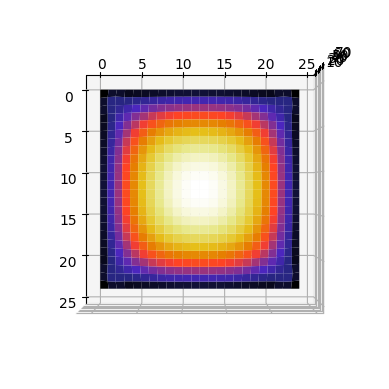

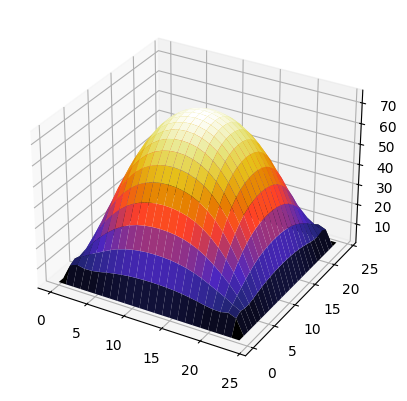

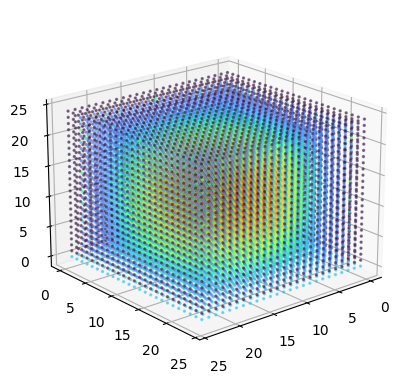

In [237]:
x1 = 2
x3 = 21
m0 = 20
a = 10
b = 2
c = 0.5
n = 50 #розмір 'куба'
du = dv = dw = 2
cu = n // du
cv = n // dv
cw = n // dw
dt = 0.5
shape = (cu, cv, cw)
x = x1 * np.ones(shape)
y = x1 * np.ones(shape)
t_lim = 50

def m(x):
    if x < m0/b:
        return m0 - b * x
    return 0

for t in np.arange(0, t_lim, dt):

    for i in range(cu):
        for j in range(cv):
            y[i, j , 0] = x[i, j , 0] - c * dt * (x[i, j , 0] - x3)
        
    for i in range(1, cu - 1):
        for j in range(1, cv - 1):
            for k in range(1, cw - 1):
                ddu = (x[i + 1, j, k] - 2 * x[i, j, k] + x[i - 1, j, k])/ (du ** 2)
                ddv = (x[i, j + 1, k] - 2 * x[i, j, k] + x[i, j - 1, k])/ (dv ** 2)
                ddw = (x[i, j, k + 1] - 2 * x[i, j, k] + x[i, j, k - 1])/ (dw ** 2)
                y[i, j, k] = x[i, j, k] + (a * m(x[i, j, k]) + ddu + ddv + ddw) * dt
    
    x = y.copy()

X, Y = np.meshgrid(range(n // du), range(n // dv))

fig = plt.figure()
ax_3d = fig.add_subplot(projection='3d')
ax_3d.view_init(90, 0)
ax_3d.plot_surface(X, Y, x[:, :, 10], cmap='CMRmap')


fig = plt.figure()
ax_3d1 = fig.add_subplot(projection='3d')
ax_3d1.plot_surface(X, Y, x[:, :, (n // dw) // 2], cmap='CMRmap')

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
X, Y, Z = np.meshgrid(range(n // du), range(n // dv), range(n // dw))
ax.view_init(20, 50)
ax.scatter(X, Y, Z, c = x, cmap='turbo', s = 2, alpha = 0.5)